# Random Forest and Decision Trees Machine Learning Project

This project takes data from Lending Club - a company in the United States that connects people who require a loan and investors who are willing to lend out money. This assignment attempts to take data that was provided by Lending Club and use it to create a Machine Learning model to see if we can identify which clients have a higher probability of paying back their loans entirely opposed to clients who default. 

The data is publically available from the Lending Club website as provided below. The CSV spreadsheet that we are using for our project has been previously cleaned of null values.

https://www.lendingclub.com/info/download-data.action

It's worth noting that Lending Club underwent controversy 2016. This data is from before that event, even before lending club went public as the Loans data is from 2007 - 2010.

Below is a breakdown of what our columns represent. In our data we will be using the column not.fully.paid as an indicator for a client who was able to sucessfully pay off their loan entirely or not with a 1 representing a client that did not pay back their loan entirely and a 0 for a client that did. 

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis

In [6]:
loans['credit.policy'].value_counts()
# While assessing for client's 

1    7710
0    1868
Name: credit.policy, dtype: int64

Text(0.5,1,'Credit Policy vs. Fico Scores histogram')

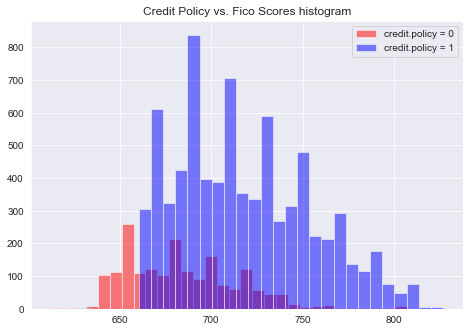

In [7]:
sns.set_style('darkgrid')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(loans.fico.loc[loans['credit.policy'] == 0], bins = 30, 
        alpha = 0.5, color = 'r', label = 'credit.policy = 0')
ax.hist(loans.fico.loc[loans['credit.policy'] == 1], bins = 30, 
        alpha = 0.5, color = 'b', label = 'credit.policy = 1')
ax.legend()
ax.set_title('Credit Policy vs. Fico Scores histogram')

The credit policy indicator seperates clients from people who meet Lending Club's underwriting standard (1) or does not meet Lending Club's underwriting standard (0)

Right from looking at this chart we can see some important information regarding clients who meet Lending Club's underwriting policies. 

1. In our data there are significantly more people who meet lending policies as opposed to people who do not meet 
2. People who do not meet Lending Club's underwriting policies tend to have a lower FICO score than people who meet the credit policy requirements.
3. it's also worth noting that there is a drop off at around the 660 mark for FICO scores people who meet underwriting standards - indicating that Lending Club has a minimum FICO score for lending at around that mark.

Text(0.5,1,'Credit Policy vs. Fico Scores histogram')

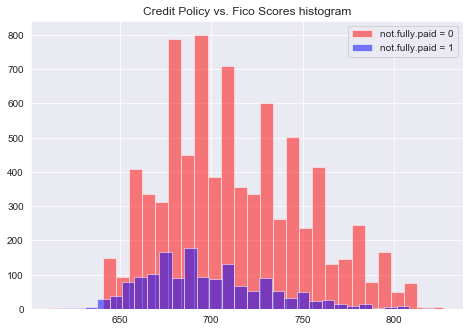

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(loans.fico.loc[loans['not.fully.paid'] == 0], bins = 30, 
        alpha = 0.5, color = 'r', label = 'not.fully.paid = 0')
ax.hist(loans.fico.loc[loans['not.fully.paid'] == 1], bins = 30, 
        alpha = 0.5, color = 'b', label = 'not.fully.paid = 1')

ax.legend()
ax.set_title('Credit Policy vs. Fico Scores histogram')

The Chart above shows a histogram for people who have fully paid back their loans as opposed to people that haven't. From this chart we can gather that:

1. More people have paid back their loans as opposed to people that haven't
2. That the distribution for people who have paid off their loans vs people that are similar. 
3. There is not a sharp cut off from the FICO scores as the previous credit policy policy histogram indicating that FICO scores above a certain threshold does not represent a client's ability to repay their loans back too significantly. 

Text(0.5,1,'Countplot of Loans Not Fully Paid Organized by Purpose of Funds')

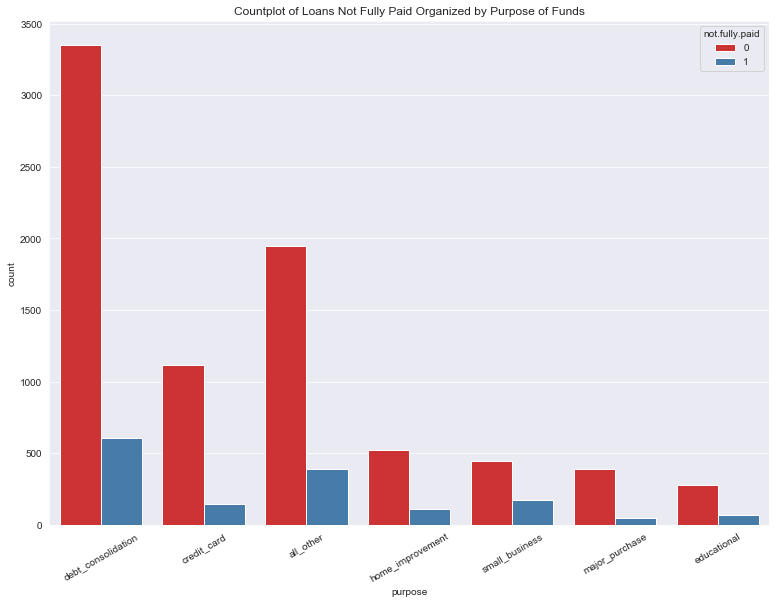

In [9]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_axes([0,0,1,1])

sns.countplot(data = loans, x = 'purpose', hue = 'not.fully.paid', palette = 'Set1')
plt.xticks(rotation = 30)
ax.set_title('Countplot of Loans Not Fully Paid Organized by Purpose of Funds')

From this countplot we can see that the most common reason for acquiring loans is debt consolidation - followed by credit card.

In [10]:
print(loans['not.fully.paid'].sum()/loans['not.fully.paid'].shape[0])
print('This is the percentage of loans that are not fully paid')

0.16005429108373356
This is the percentage of loans that are not fully paid


In [11]:
loans.loc[loans['not.fully.paid']==1]['purpose'].value_counts()/loans['purpose'].value_counts()

all_other             0.166023
credit_card           0.115689
debt_consolidation    0.152388
educational           0.201166
home_improvement      0.170111
major_purchase        0.112128
small_business        0.277868
Name: purpose, dtype: float64

This shows the percentage of loans not fully paid broken down by the purpose of funds. In total from our dataset approximately 16% of all loans are not fully paid. By breaking down the data further by purpose of funds, we can see which lending purposes are higher risk for default. In general, credit cards and debt consolidation pose a slightly lower risk for default with just above 11% not being fully paid back. However one statistic that stands out is small business at 27.8%, which is significantly higher than the other lending purposes. This would show that lending to small businesses be a higher risk for default than the other credit lending purposes.

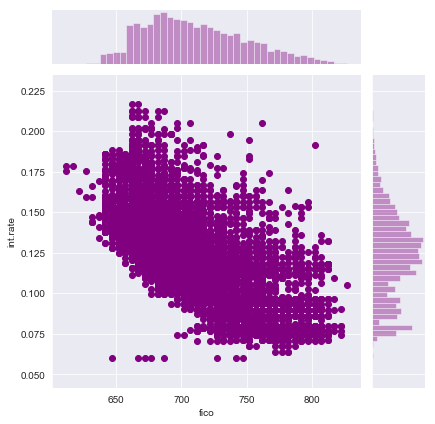

In [12]:
sns.jointplot(data = loans, x = 'fico', y = 'int.rate', color = 'purple')

Here this plot shows that as your FICO score increases, your interest rates decrease. This shows that lenders are willing to give loans at a lower rate to potential borrowers who have a higher FICO score.

<Figure size 792x504 with 0 Axes>

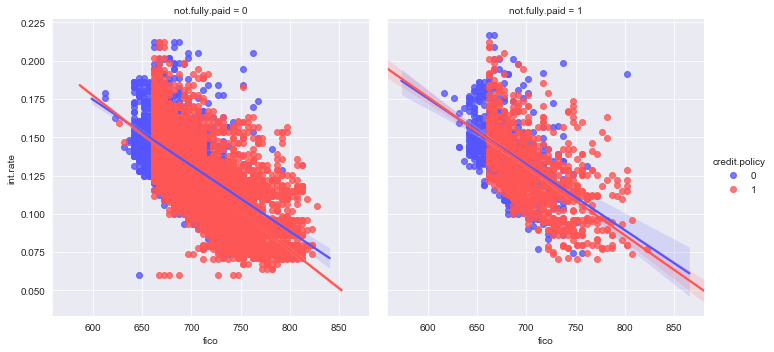

In [13]:
plt.figure(figsize = (11,7))
sns.lmplot(data = loans, x = 'fico', y = 'int.rate',
           col = 'not.fully.paid', hue = 'credit.policy', palette = 'seismic')

This regression plot shows the same information as above in regards to FICO scores and interest rates, but broken down further to show if initially the client was able to meet Lending Club policy requirements and if the client was ultimately able to pay back their loan in time or not. One thing to note about the data in both plots are very similar in shape and distribution. 

What we can gather from this plot is that the interest rate that is given to the clients, which derive from the interest rates given the correlation between the two does not have a significant impact on a client’s ability to pay back a loan. 

It is worth noting that the data we are using is from 2007-2010. Lending club policies have changed greatly and the company has also underwent a management change in 2016 due to fraudulent reporting. Prior to the mortgage crisis before lending rule changes the underwriting policies applied for lending club were not as stringent and a client was still able to take out a loan if they were not capable of meeting underwriting standards. 


### Decision Tree and Random Forest Machine Learning Model

In [14]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Note that the purpose column is an object category, this must be changed to a numerical value before running a machine learning model with our data.

In [15]:
data = pd.get_dummies(loans, columns = ['purpose'], drop_first = True)
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
X = data.drop('not.fully.paid', axis =1)
y = data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
predictions = dtree.predict(X_test)

In [20]:
print (classification_report(y_test, predictions), confusion_matrix(y_test, predictions)) 

             precision    recall  f1-score   support

          0       0.85      0.81      0.83      2426
          1       0.19      0.23      0.21       448

avg / total       0.75      0.72      0.74      2874
 [[1976  450]
 [ 343  105]]


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(n_estimators = 300)

In [23]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
rfc_predict = rfc.predict(X_test)

In [25]:
print(classification_report(y_test, rfc_predict))

             precision    recall  f1-score   support

          0       0.85      0.99      0.91      2426
          1       0.25      0.02      0.03       448

avg / total       0.75      0.84      0.77      2874



In [26]:
print(confusion_matrix(y_test, rfc_predict))

[[2405   21]
 [ 441    7]]


After we look at our classification report to assess model perofrmance generally speaking our decision tree model has a f1-score around 75% while our Random Forest has a f1-score of 77%. On first glance it may appear that our Random Forest is a more accurate model, however if we look closely at the Recall of the Random Forest classification report we can see an alarming 1-3% recall depending on the path the random forest takes. 

Recall is the percentage that our model can accurately identify the True Positives of a dataset. A model such as loan repayment analysis may want to use Recall as a measure of success in a model because of the loss associated with a misclassified positve event. In our case this  is the loss that may be associated with a client that may potentially default on their loan. This is where an alarming statistic dispalyed because the second row the indicator 1 on not.fully.paid (indicating that this is how well we identify people who may potentially default on loans) is only only 1-3% indicating we can only correctly identify 1-3% of the likely to default clients. while the remaining are missed misclassified as borrowers who will be able to pay off their loans on time. 

In [27]:
print(confusion_matrix(y_test, rfc_predict)[:,1].sum()/confusion_matrix(y_test, rfc_predict).sum())
print('This is the percentage of people who were classified from our Random Forest Model as unable to fully pay off loan')
print('\n')
print(confusion_matrix(y_test, rfc_predict)[1,:].sum()/confusion_matrix(y_test, rfc_predict).sum())
print('This is the actual percentage of people who did not fully pay off their loans from our training set')

0.009742519137091163
This is the percentage of people who were classified from our Random Forest Model as unable to fully pay off loan


0.1558803061934586
This is the actual percentage of people who did not fully pay off their loans from our training set


Remember that previously we have discovered that approximately 16% of all loans were not fully paid off from our entire dataset. Please note that this number appears high because the period of time we are taking our data from happens to be the Subprime Mortgage Crisis that occured in the United States. The Random Forest model on the other hand - calculated a significantly smaller percentage of people who were able to pay off their loans entirely indicated by the cell above. This is why for now our Decision Tree model serves as a better model to identify borrowers who may potentially default on their loans.

I am planning on releasing further information regarding this model to increase the accuracy of the Random Forest as well as show additions to demonstrate an understanding of Entrophy and Information Gain to show the process of how nodes are split occurs in a Decision Tree. 